In [1]:
# Import dependencies
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
import tensorflow as tf


C:\Users\jesse\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load your dataset into a DataFrame
spotify_df = pd.read_csv('C:/Users/jesse/OneDrive/Desktop/GitHub/ML_Project/Cleaned_Data/processed_data_cleaned_12March.csv')
spotify_df.dtypes

track_id              object
track_name            object
track_artist          object
track_popularity       int64
playlist_genre        object
playlist_subgenre     object
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
stream_count         float64
duration_sec         float64
months                 int64
dtype: object

In [3]:
# Display your DataFrame
spotify_df.head()

,track_id,track_name,track_artist,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream_count,duration_sec,months
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,36892097.0,194.754,57
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,26063851.0,162.600,51
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,70546338.0,176.616,56
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,11862340.0,169.093,56
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,63578139.0,189.052,60


In [4]:
#  Convert the columns that have a dtype "object" into a list
spotify_cat = spotify_df.dtypes[spotify_df.dtypes == "object"].index.tolist()

In [5]:
# Check the Number of unique values in each column
spotify_df[spotify_cat].nunique()

track_id             28290
track_name           23403
track_artist         10681
playlist_genre           6
playlist_subgenre       24
dtype: int64

In [6]:
# Create dummy variables. Drop_first=True is used to prevent multicollinearity. Dtype=int is used so the data can be used in our model.
combined_spotify_df = pd.get_dummies(spotify_df, columns=['playlist_genre', 'playlist_subgenre'], drop_first=True, dtype=int)


In [7]:
# Drop columns that would muddy up our model.
combined_spotify_df.drop(columns=['track_id', 'track_name', 'track_artist'], inplace=True)
combined_spotify_df.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,...,0,0,0,0,0,0,0,0,0,0
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,...,0,0,0,0,0,0,0,0,0,0
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,...,0,0,0,0,0,0,0,0,0,0
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,...,0,0,0,0,0,0,0,0,0,0
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Define bins and labels for discretization
bins = [0, 50000000, 100000000, 150000000, 200000000, 500000000, 1000000000]
labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High', 'Very-High']

In [11]:
# Bin the 'stream_count' values into discrete classes
combined_spotify_df['y_discrete'] = pd.cut(combined_spotify_df['stream_count'], bins=bins, labels=labels)

In [12]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical labels in the 'y_encoded' column
combined_spotify_df['y_encoded'] = label_encoder.fit_transform(combined_spotify_df['y_discrete'])

#Update the target variable 'y_encoded' with the encoded numerical values
y_encoded = combined_spotify_df['y_encoded']

In [13]:
# Check the data type of the 'y_encoded' column
print("Data Type of 'y_encoded' column:")
print(combined_spotify_df['y_encoded'].dtype)

# Display the unique values in the 'y_encoded' column
print("\nUnique Values in 'y_encoded' column:")
print(combined_spotify_df['y_encoded'].unique())

Data Type of 'y_encoded' column:
int32

Unique Values in 'y_encoded' column:
[1 4 2 5 0 3 6]


In [14]:
# Split our preprocessed data into features (X) and the encoded target array (y_encoded)
X = combined_spotify_df.drop(columns=['stream_count'])
y_encoded = combined_spotify_df['y_encoded']


In [15]:
# Display data types of columns in the feature matrix X
print("Data Types of Columns in X:")
print(X.dtypes)

# Iterate through each column and display unique values
for col in X.columns:
    unique_values = X[col].unique()
    print(f"Column: {col}, Unique Values: {unique_values}")

# Display columns with object dtype
object_columns = X.select_dtypes(include=['object']).columns
print("Columns with Object Dtype:")
print(object_columns)

Data Types of Columns in X:
track_popularity                                  int64
danceability                                    float64
energy                                          float64
key                                               int64
loudness                                        float64
mode                                              int64
speechiness                                     float64
acousticness                                    float64
instrumentalness                                float64
liveness                                        float64
valence                                         float64
tempo                                           float64
duration_sec                                    float64
months                                            int64
playlist_genre_latin                              int32
playlist_genre_pop                                int32
playlist_genre_r&b                                int32
playlist_genre_rap  

In [16]:
# Print the shape to double check everything is correct
print(f"X shape: {X.shape}")
print(f"y shape: {y_encoded.shape}")

X shape: (32746, 44)
y shape: (32746,)


In [17]:
# Create a KFold cross-validation object with five folds
k_folds = KFold(n_splits = 5)

In [18]:
# Drop columns that shouldn't be features in X
X.drop(columns=['y_discrete', 'y_encoded', 'track_popularity'], inplace=True)

In [19]:
# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Perform cross-validation and get the scores
scores = cross_val_score(clf, X, y_encoded, cv=k_folds)

In [20]:
# Fit the DecisionTreeClassifier(clf) to the training data
clf.fit(X, y_encoded)

# Retrieve the feature importances calculated by the DecisionTreeClassifier
clf.feature_importances_

array([0.07789339, 0.07454339, 0.0466262 , 0.08271576, 0.01285725,
       0.07630144, 0.07700514, 0.06378654, 0.07332731, 0.07882972,
       0.07894401, 0.07358961, 0.10844846, 0.00489371, 0.00833931,
       0.00329599, 0.00339703, 0.00978065, 0.00076295, 0.00140102,
       0.00357313, 0.00030023, 0.00103992, 0.00103522, 0.00138252,
       0.00183228, 0.00569194, 0.00390187, 0.00248255, 0.00082269,
       0.00050649, 0.00053628, 0.00266309, 0.00250148, 0.00348308,
       0.00104824, 0.00198645, 0.00140483, 0.00182425, 0.00258299,
       0.00266157])

In [21]:
# Zip the feature names with their corresponding importance values and sort the list based on importance
feature_importances = list(zip(X.columns, clf.feature_importances_))
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Use a for loop to print out our findings
for feature, importance in feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: months, Importance: 0.1084484601653832
Feature: loudness, Importance: 0.08271575743026986
Feature: tempo, Importance: 0.0789440110824973
Feature: valence, Importance: 0.07882972034600716
Feature: danceability, Importance: 0.0778933907855043
Feature: acousticness, Importance: 0.0770051387347567
Feature: speechiness, Importance: 0.07630144109802758
Feature: energy, Importance: 0.07454339477799023
Feature: duration_sec, Importance: 0.07358961270169498
Feature: liveness, Importance: 0.0733273068310486
Feature: instrumentalness, Importance: 0.06378654392731103
Feature: key, Importance: 0.04662619588655537
Feature: mode, Importance: 0.012857249867519
Feature: playlist_genre_rock, Importance: 0.009780652077561892
Feature: playlist_genre_pop, Importance: 0.008339309390940733
Feature: playlist_subgenre_hip pop, Importance: 0.0056919449935982054
Feature: playlist_genre_latin, Importance: 0.004893710271225724
Feature: playlist_subgenre_indie poptimism, Importance: 0.0039018698614832256
F

In [22]:
feature_importances

[('months', 0.1084484601653832),
 ('loudness', 0.08271575743026986),
 ('tempo', 0.0789440110824973),
 ('valence', 0.07882972034600716),
 ('danceability', 0.0778933907855043),
 ('acousticness', 0.0770051387347567),
 ('speechiness', 0.07630144109802758),
 ('energy', 0.07454339477799023),
 ('duration_sec', 0.07358961270169498),
 ('liveness', 0.0733273068310486),
 ('instrumentalness', 0.06378654392731103),
 ('key', 0.04662619588655537),
 ('mode', 0.012857249867519),
 ('playlist_genre_rock', 0.009780652077561892),
 ('playlist_genre_pop', 0.008339309390940733),
 ('playlist_subgenre_hip pop', 0.0056919449935982054),
 ('playlist_genre_latin', 0.004893710271225724),
 ('playlist_subgenre_indie poptimism', 0.0039018698614832256),
 ('playlist_subgenre_dance pop', 0.0035731321823718205),
 ('playlist_subgenre_post-teen pop', 0.0034830787356157716),
 ('playlist_genre_rap', 0.0033970320127174563),
 ('playlist_genre_r&b', 0.003295994648736663),
 ('playlist_subgenre_permanent wave', 0.002663089383026164

In [23]:
# Print the array of scores
print(f"Cross Validation Scores: {scores}")
print(f"Average Score: {scores.mean()}")

Cross Validation Scores: [0.48229008 0.46098641 0.46419301 0.4768667  0.68789128]
Average Score: 0.5144454942716037


C:\Users\jesse\AppData\Local\Temp\ipykernel_17568\3027697145.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.yaxis.set_ticklabels([str(label.get_text()) for label in cbar.ax.yaxis.get_ticklabels()], color='snow')


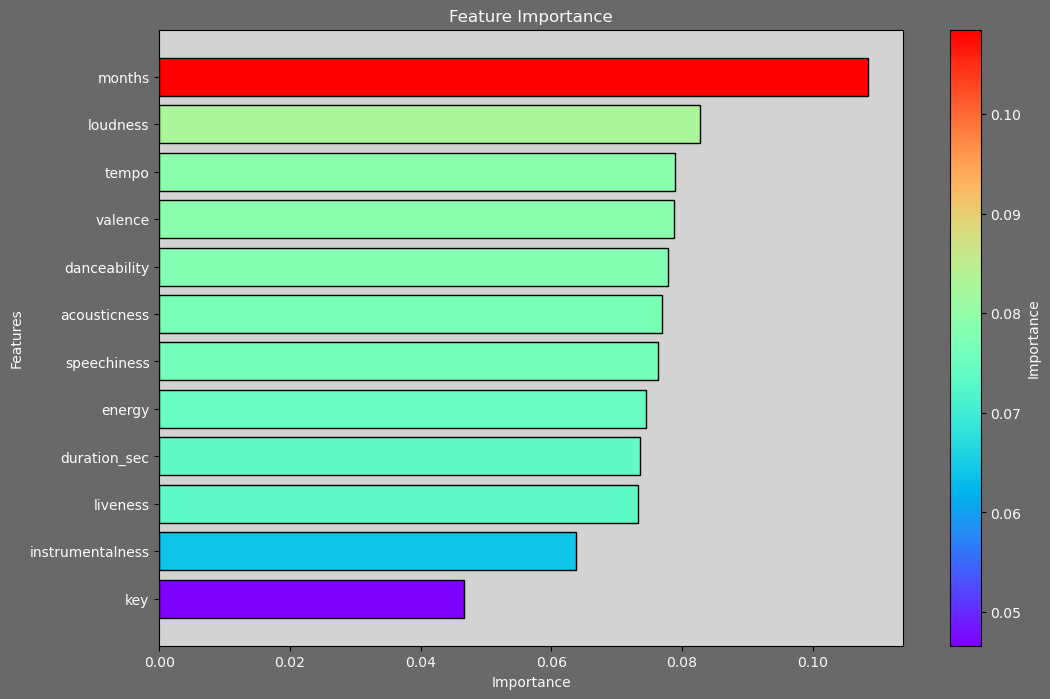

In [34]:
# Import dependencies to graph the most important features as well as the graph's color schemes
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import numpy as np

#Extract the feature names and importance values from the list
features = [x[0] for x in feature_importances]
importance = [x[1] for x in feature_importances]

# Show only the top 12 features/importance values.  12 is decided due 
# to the 12th number being: .043, but the next number is much lower at .015
top_features = features[:12]
top_importance = importance[:12]

# Define a colormap and normalize the importance values
colormap = plt.colormaps['rainbow']
norm = mcolors.Normalize(vmin=min(top_importance), vmax=max(top_importance))

# Assign colors based on the normalized importance values
colors = [colormap(norm(value)) for value in top_importance]

# Create a barplot using matplotlib
plt.figure(figsize=(12, 8), facecolor='dimgrey')
bars = plt.barh(top_features, top_importance, color=colors)

# Add a black outline around the bars
for bar in bars:
    bar.set_edgecolor('black')

# Set the background behind the bars
plt.gca().set_facecolor('lightgrey')

# Make the title, xlabel, and ylabel, with colors
plt.title('Feature Importance', color='snow')
plt.xlabel('Importance', color='snow')
plt.ylabel('Features', color='snow')

# Add a colorbar to show the mapping of importance values to colors
sm = ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])

# Specify the axis for the colorbar
cbar = plt.colorbar(sm, ax=plt.gca())

# Add a label to the colorbar
cbar.set_label('Importance', color='snow')

# Set color of colorbar numbers to 'snow'
cbar.ax.yaxis.set_ticklabels([str(label.get_text()) for label in cbar.ax.yaxis.get_ticklabels()], color='snow')

# set x and y-axis tick colors to 'snow'
plt.xticks(color='snow')
plt.yticks(color='snow')

# Invert y-axis to display the most important feature
plt.gca().invert_yaxis() 

# Save the file
plt.savefig('feature_importance.png')
# Show 
plt.show()



In [25]:
# Import dependencies for XGBoost
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [26]:
# Split the data into training and testing sets.  Split data to avoid poor performance
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 42)

In [27]:
# Create an instance of the XGBoost classifier model
xgb = XGBClassifier()

# Define a dictionary 'param_grid' that contains the hyperparameters to be tuned during the grid search
param_grid = {
    'n_estimators': [1500],
    'learning_rate': [0.6],
    'max_depth': [11]
}

# Create a GridSearchCV object named 'grid_search'.  The GridSearchCV class takes the 
# XGBoost model xgb, the parameter grid param_grid, and cv=5(5-fold cross-validation 
# strategy) to evaluate the performance of each parameter combination
grid_search = GridSearchCV(xgb, param_grid, cv=5)

# Fit the GridSearchCV object to the training data 'X_train', 'y_train'
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.6], 'max_depth': [11],
                         'n_estimators': [1500]})

In [28]:
# Retrieve the best estimator(best model)
best_xgb = grid_search.best_estimator_
# Retrieve the best parameters found by the GridSearchCV process
best_params = grid_search.best_params_
# Show the best parameters
best_params

{'learning_rate': 0.6, 'max_depth': 11, 'n_estimators': 1500}

In [29]:
# Make predictions on the test data X_test
y_pred = best_xgb.predict(X_test)

# Prepare the predicted target values to calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the calculated accuracy score
print(accuracy)

0.7937404580152672


In [30]:
# Import dependencies to pickle the XGBoost model
import xgboost as xgb
import pickle

# Save the model to a file using pickle
with open('best_xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)

1. preprocess
2. Create a simple model
3. Try other models
4. Pick the model with the best cross validation score
5. Train the model on entire data
6. Evaluate test set
7. Remember the pickle